# LINEAR_REGREESION_MULTIVARIABLE

#   ▬  ▬  ▬  ▬ ▬  ▬  ▬  ▬ ▬  ▬  ▬  ▬ ▬  ▬  ▬  ▬ ▬  ▬  ▬  ▬ ▬  ▬  ▬  ▬

The goal of multiple linear regression (MLR) is to model the linear relationship between the explanatory (independent) variables and response (dependent) variable.

In essence, multiple regression is the extension of ordinary least-squares (OLS) regressionthat involves more than one explanatory variable.

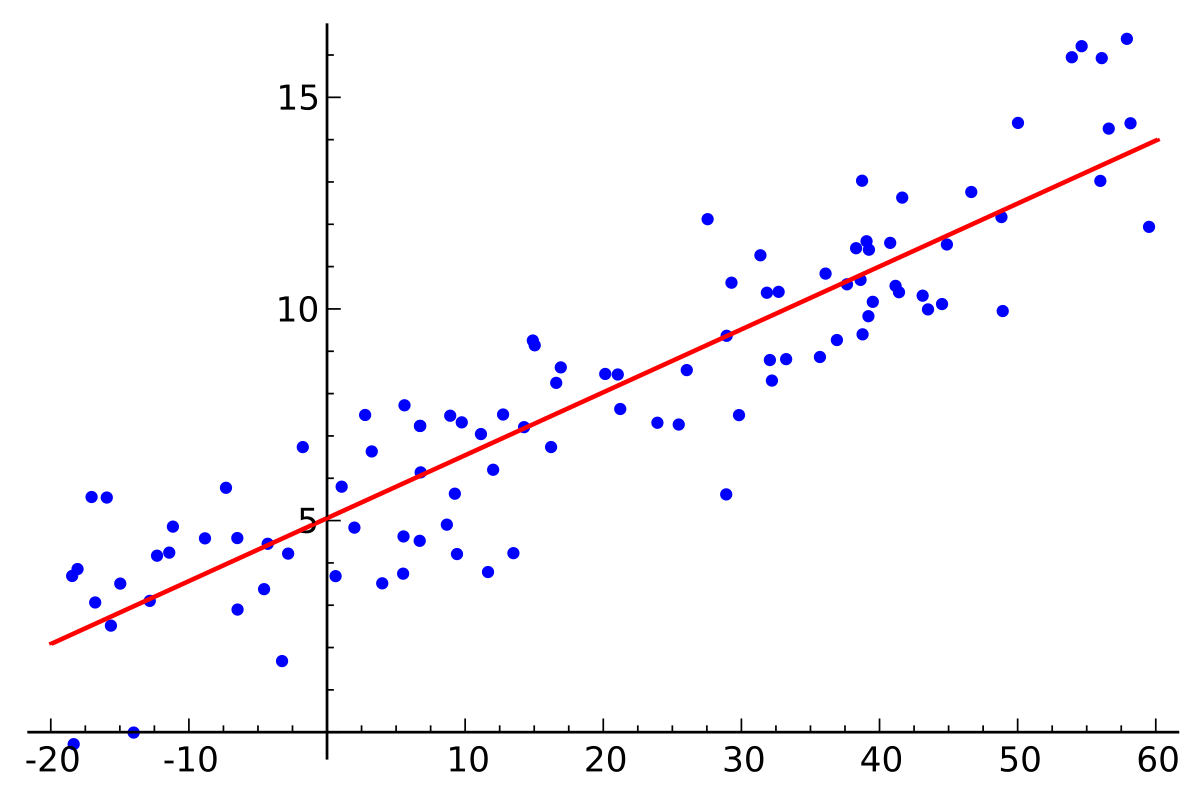

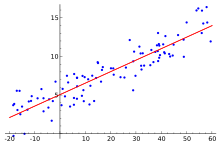

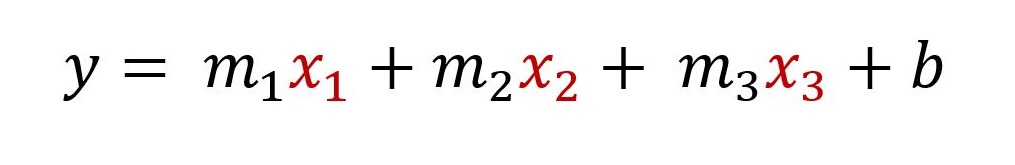

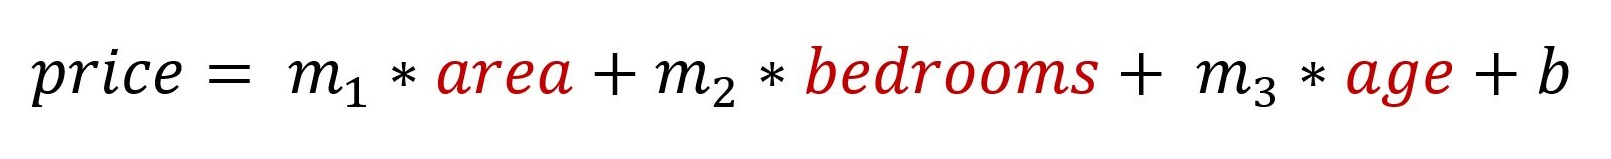

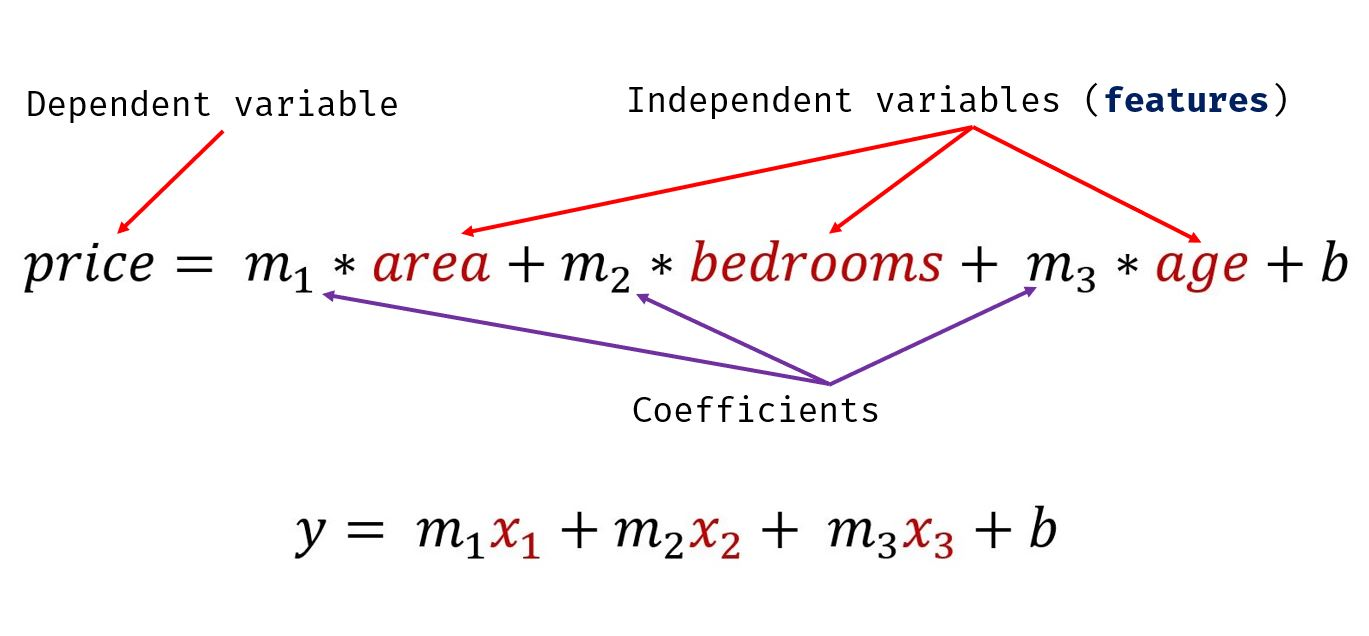

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("homeprices.csv")
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [2]:
df.shape

(6, 4)

In [2]:
import seaborn as sn

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   area      6 non-null      int64  
 1   bedrooms  5 non-null      float64
 2   age       6 non-null      int64  
 3   price     6 non-null      int64  
dtypes: float64(1), int64(3)
memory usage: 320.0 bytes


In [4]:
df.isnull().sum()

area        0
bedrooms    1
age         0
price       0
dtype: int64

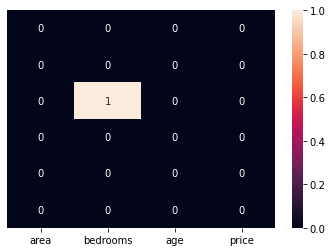

In [5]:
sn.heatmap(df.isnull(),yticklabels=False,annot=True)

In [6]:
df.bedrooms.median()

4.0

In [7]:
df.bedrooms.fillna(df.bedrooms.median())

0    3.0
1    4.0
2    4.0
3    3.0
4    5.0
5    6.0
Name: bedrooms, dtype: float64

In [10]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [8]:
df.bedrooms.fillna(method='bfill')

0    3.0
1    4.0
2    3.0
3    3.0
4    5.0
5    6.0
Name: bedrooms, dtype: float64

In [9]:
df.bedrooms.fillna(method='ffill')

0    3.0
1    4.0
2    4.0
3    3.0
4    5.0
5    6.0
Name: bedrooms, dtype: float64

In [10]:
df.bedrooms.interpolate()

0    3.0
1    4.0
2    3.5
3    3.0
4    5.0
5    6.0
Name: bedrooms, dtype: float64

In [8]:
df.bedrooms = df.bedrooms.fillna(df.bedrooms.median())

In [9]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


Text(0, 0.5, 'PRICE')

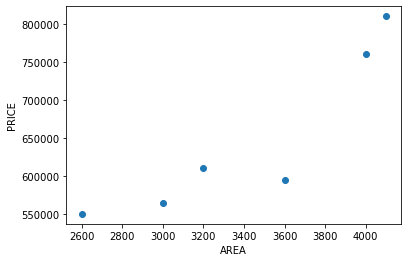

In [10]:
plt.scatter(df.area,df.price)
plt.xlabel("AREA")
plt.ylabel("PRICE")

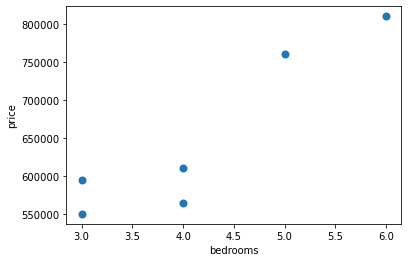

In [14]:
plt.xlabel("bedrooms")
plt.ylabel("price")
plt.scatter(df['bedrooms'],df['price'],linewidth=2)

Text(0, 0.5, 'PRICE')

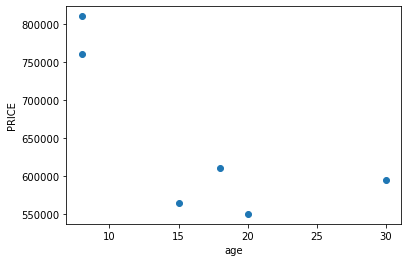

In [15]:
plt.scatter(df.age,df.price)
plt.xlabel("age")
plt.ylabel("PRICE")

In [11]:
df.corr()

,area,bedrooms,age,price
area,1.000000,0.751710,-0.445300,0.901476
bedrooms,0.751710,1.000000,-0.877221,0.919803
age,-0.445300,-0.877221,1.000000,-0.734167
price,0.901476,0.919803,-0.734167,1.000000


In [12]:
import seaborn as sn

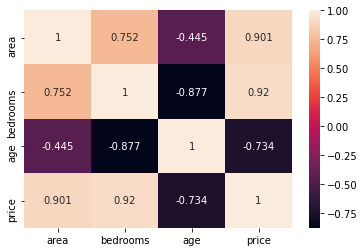

In [13]:
sn.heatmap(df.corr(),annot=True,fmt='.3g')

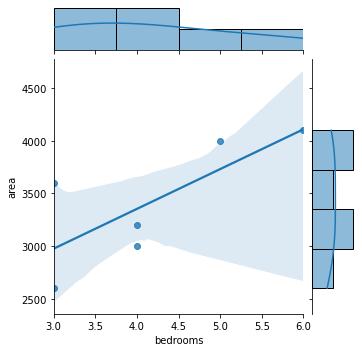

In [20]:
sn.jointplot(data=df,x='bedrooms',y='area',kind='reg',height=5)

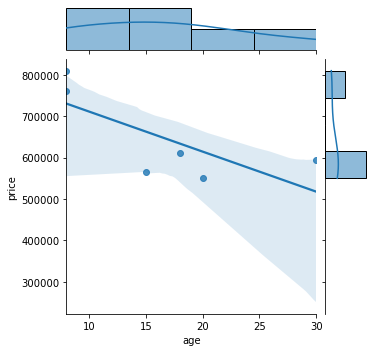

In [21]:
sn.jointplot(data=df,x='age',y='price',kind='reg',height=5)

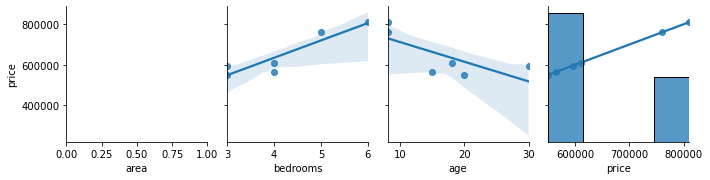

In [23]:
sn.pairplot(df,y_vars='price',kind='reg')

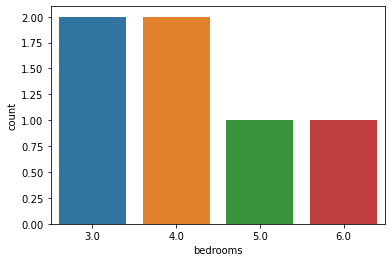

In [24]:
sn.countplot(data=df,x='bedrooms')

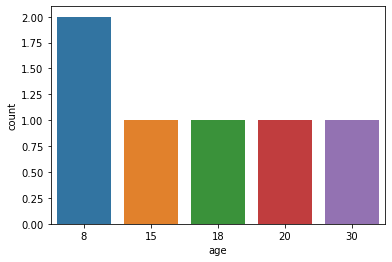

In [25]:
sn.countplot(data=df,x='age')

In [ ]:
df

In [15]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(df[["area","bedrooms","age"]],df.price)

LinearRegression()

In [16]:
reg.predict([[3000,4,15]])

array([602590.07937407])

In [17]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [29]:
reg.intercept_

221323.00186540443

In [18]:
reg.score(df[["area","bedrooms","age"]],df.price)

0.9550196399325819

In [19]:
area = 3000
bedroom = 4
age = 15
price =  112.06244194 * area + 23388.88007794*bedroom +   (-3231.71790863 *age) +221323.00186540443
price

602590.0793677145

#   ▬  ▬  ▬  ▬ ▬  ▬  ▬  ▬ ▬  ▬  ▬  ▬ ▬  ▬  ▬  ▬ ▬  ▬  ▬  ▬ ▬  ▬  ▬  ▬

# PRACTICES

#   ▬  ▬  ▬  ▬ ▬  ▬  ▬  ▬ ▬  ▬  ▬  ▬ ▬  ▬  ▬  ▬ ▬  ▬  ▬  ▬ ▬  ▬  ▬  ▬

In [33]:
df1 = pd.read_csv("hirings.csv")
df1

,experience,test_score,interview_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [ ]:
sn.heatmap(df1.isnull(),yticklabels=False,cmap='viridis')

In [ ]:
df1.experience.fillna("zero")

In [ ]:
df1.experience = df1.experience.fillna("zero")

In [ ]:
df1

In [ ]:
#pip install word2number

from word2number import w2n


In [ ]:
df1.experience.apply(w2n.word_to_num)


In [ ]:
df1.experience = df1.experience.apply(w2n.word_to_num)

In [ ]:
df1

In [ ]:
df1.test_score.median()

In [ ]:
df1.test_score.fillna(df1.test_score.median())

In [ ]:
df1.test_score = df1.test_score.fillna(df1.test_score.median())

In [ ]:
df1

In [ ]:
correlation = df1.corr()
correlation

In [ ]:
sn.jointplot(data=df1,x='experience',y='salary',kind='reg',height=5)

In [ ]:
sn.jointplot(data=df1,x='test_score',y='salary',kind='reg')

In [ ]:
sn.jointplot(data=df1,x='interview_score',y='salary',kind='reg')

In [ ]:
reg1 = LinearRegression()
reg1.fit(df1[["experience","test_score","interview_score"]],df1.salary)

In [ ]:
reg1.coef_

In [ ]:
reg1.intercept_

In [ ]:
reg1.predict([[0,10,10]])

In [ ]:
reg1.predict([[3,10,10],[12,5,7]])

In [ ]:
reg1.score(df1[["experience","test_score","interview_score"]],df1.salary)

#   ▬  ▬  ▬  ▬ ▬  ▬  ▬  ▬ ▬  ▬  ▬  ▬ ▬  ▬  ▬  ▬ ▬  ▬  ▬  ▬ ▬  ▬  ▬  ▬

In [3]:
df2=pd.read_csv(r'income(lin_multi_value).csv')
df2.head(5)

NameError: name 'pd' is not defined

In [ ]:
df2.shape

In [ ]:
df2.isnull().sum()

1250.0